In [1]:
import pandas as pd
data=pd.read_csv('RFM.csv',sep=',',encoding="latin8")
import matplotlib.pyplot as plt

In [2]:
data

,Client,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,10009606,19,4,97.4,2,2,3,7,Hibernating
1,10014178,8,4,79.7,4,2,3,9,Potential loyalists
2,10020905,13,10,151.2,3,1,2,6,Promising
3,10808222,7,16,402.8,4,1,1,6,New customers
4,11114832,2,13,209.1,4,1,1,6,New customers
...,...,...,...,...,...,...,...,...,...
36386,MM728979,10,4,227.0,4,2,1,7,Potential loyalists
36387,MM729303,9,17,308.0,4,1,1,6,New customers
36388,MM729529,11,1,29.0,4,4,4,12,Champions
36389,SC000004,4,52,2160.3,4,1,1,6,New customers


In [3]:
data.drop('Client', axis=1, inplace=True)

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
le = LabelEncoder()
data['Segment'] = le.fit_transform(data['Segment'])
data

,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,19,4,97.4,2,2,3,7,3
1,8,4,79.7,4,2,3,9,6
2,13,10,151.2,3,1,2,6,7
3,7,16,402.8,4,1,1,6,5
4,2,13,209.1,4,1,1,6,5
...,...,...,...,...,...,...,...,...
36386,10,4,227.0,4,2,1,7,6
36387,9,17,308.0,4,1,1,6,5
36388,11,1,29.0,4,4,4,12,2
36389,4,52,2160.3,4,1,1,6,5


[0 0 0 ... 0 1 0]
2 Silhouette Score: 0.726
[0 0 0 ... 0 2 0]
3 Silhouette Score: 0.654
[0 0 0 ... 0 3 0]
4 Silhouette Score: 0.610
[0 0 3 ... 0 2 0]
5 Silhouette Score: 0.574
[4 4 0 ... 4 5 4]
6 Silhouette Score: 0.551
[0 0 3 ... 0 4 0]
7 Silhouette Score: 0.526
[6 2 6 ... 2 4 2]
8 Silhouette Score: 0.511
[6 6 3 ... 0 5 0]
9 Silhouette Score: 0.480
[0 0 9 ... 8 4 8]
10 Silhouette Score: 0.475


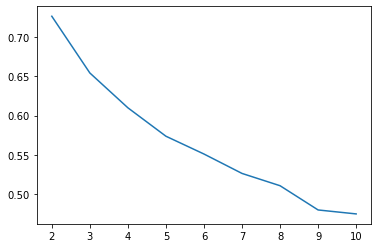

In [5]:
#Modelisation
from sklearn import cluster 
#evaluation
from sklearn.metrics import silhouette_samples, silhouette_score

y_pred_km_tab = []
silhouette_km_tab = []

for i in range(2,11):
    #modelisation
    kmeans = cluster.KMeans(n_clusters=i);
    kmeans.fit(data);
    print(kmeans.labels_)
    y_pred_km_tab.append(kmeans.labels_)
    #evaluation
    score = silhouette_score(data, kmeans.labels_, metric='euclidean')
    silhouette_km = score
    print(i,'Silhouette Score: %.3f' % score)
    silhouette_km_tab.append(silhouette_km)

plt.plot(range(2,11),silhouette_km_tab)

In [6]:
#modelisation
kmeans = cluster.KMeans(n_clusters=4);
kmeans.fit(data);
print(kmeans.labels_)
#evaluation
score = silhouette_score(data, kmeans.labels_, metric='euclidean')
silhouette_km = score
print('Silhouette Score: %.3f' % score)

[3 3 3 ... 3 2 3]
Silhouette Score: 0.610


In [7]:
groupeA=data[kmeans.labels_==0]

groupeB=data[kmeans.labels_==1]

groupeC=data[kmeans.labels_==2]

groupeD=data[kmeans.labels_==3]

<BarContainer object of 4 artists>

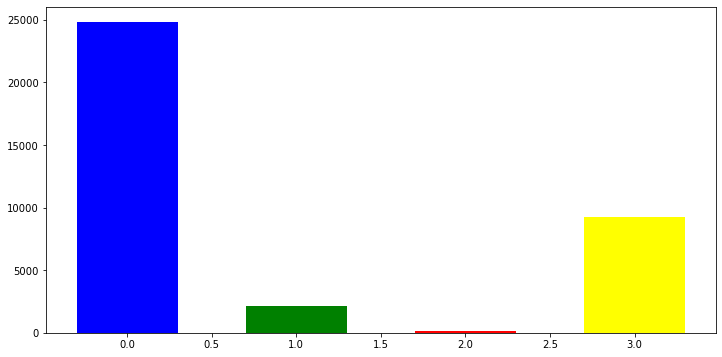

In [8]:
import numpy as np
modalites = {groupeA['R'].count(),groupeB['R'].count(),groupeC['R'].count(),groupeD['R'].count()}

# Créer l'histogramme

couleurs = ['blue', 'green', 'red', 'yellow']

# Créer une liste de positions pour les barres
positions = np.arange(len(modalites))

plt.figure(figsize=(12, 6))

# Créer l'histogramme en personnalisant les couleurs et l'espacement entre les barres
plt.bar(positions, modalites, color=couleurs,width=0.6)


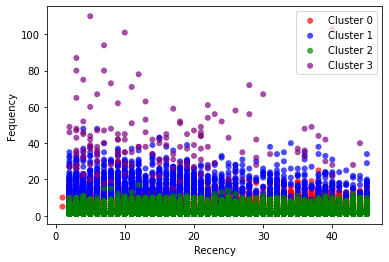

In [10]:
colors = ['red', 'blue', 'green', 'purple']

# Itérer sur chaque cluster et afficher les points
for cluster_id in range(4):
    cluster_data = data[kmeans.labels_ == cluster_id]
    plt.scatter(cluster_data['Recency'], cluster_data['Frequency'], c=colors[cluster_id], label=f'Cluster {cluster_id}', alpha=0.7, edgecolors='none')
plt.xlabel('Recency')
plt.ylabel('Fequency')
plt.legend(loc='upper right')    
plt.show()    

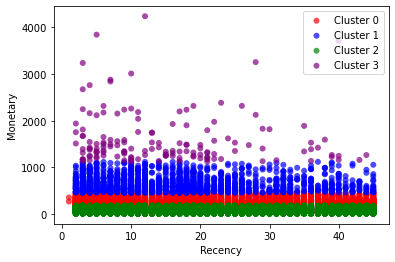

In [11]:
colors = ['red', 'blue', 'green', 'purple']

# Itérer sur chaque cluster et afficher les points
for cluster_id in range(4):
    cluster_data = data[kmeans.labels_ == cluster_id]
    plt.scatter(cluster_data['Recency'], cluster_data['Monetary'], c=colors[cluster_id], label=f'Cluster {cluster_id}', alpha=0.7, edgecolors='none')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend(loc='upper right')    
plt.show()    

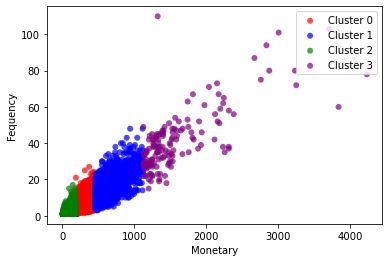

In [12]:
colors = ['red', 'blue', 'green', 'purple']

# Itérer sur chaque cluster et afficher les points
for cluster_id in range(4):
    cluster_data = data[kmeans.labels_ == cluster_id]
    plt.scatter(cluster_data['Monetary'], cluster_data['Frequency'], c=colors[cluster_id], label=f'Cluster {cluster_id}', alpha=0.7, edgecolors='none')
plt.xlabel('Monetary')
plt.ylabel('Fequency')
plt.legend(loc='upper right')    
plt.show()    

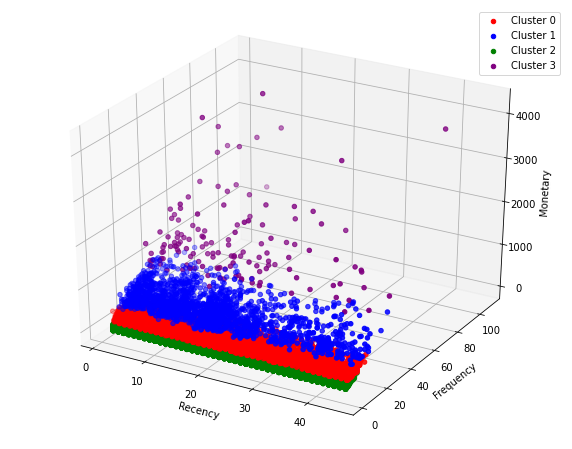

In [13]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Marqueurs de couleur pour chaque cluster
colors = ['red', 'blue', 'green', 'purple']

# Itérer sur chaque cluster et afficher les points en 3D
for cluster_id in range(4):
    cluster_data = data[kmeans.labels_ == cluster_id]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], c=colors[cluster_id], marker='o', label=f'Cluster {cluster_id}')

# Ajouter les labels des axes et la légende
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.legend(loc='upper right')

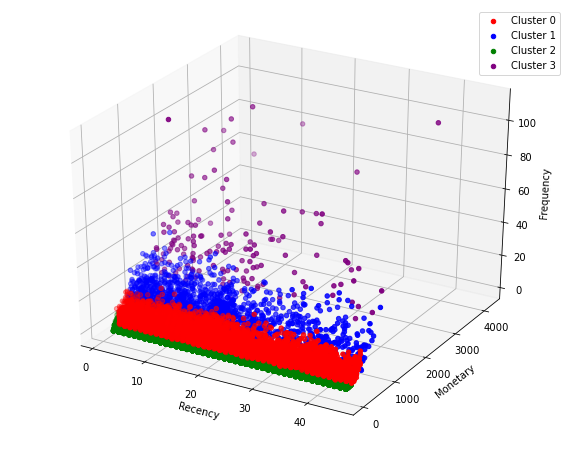

In [14]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Marqueurs de couleur pour chaque cluster
colors = ['red', 'blue', 'green', 'purple']

# Itérer sur chaque cluster et afficher les points en 3D
for cluster_id in range(4):
    cluster_data = data[kmeans.labels_ == cluster_id]
    ax.scatter(cluster_data['Recency'], cluster_data['Monetary'], cluster_data['Frequency'], c=colors[cluster_id], marker='o', label=f'Cluster {cluster_id}')

# Ajouter les labels des axes et la légende
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Frequency')
ax.legend(loc='upper right')

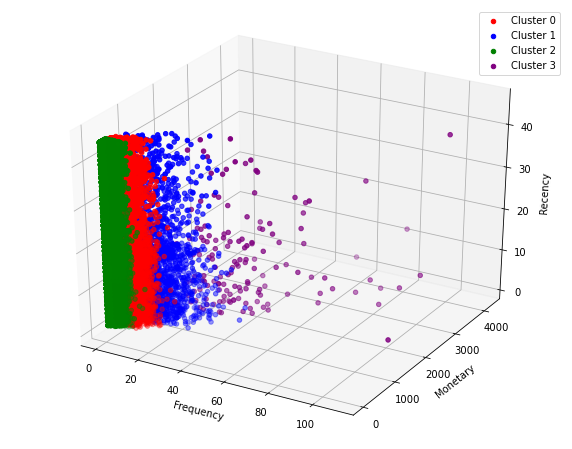

In [15]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Marqueurs de couleur pour chaque cluster
colors = ['red', 'blue', 'green', 'purple']

# Itérer sur chaque cluster et afficher les points en 3D
for cluster_id in range(4):
    cluster_data = data[kmeans.labels_ == cluster_id]
    ax.scatter(cluster_data['Frequency'], cluster_data['Monetary'], cluster_data['Recency'], c=colors[cluster_id], marker='o', label=f'Cluster {cluster_id}')

# Ajouter les labels des axes et la légende
ax.set_xlabel('Frequency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Recency')
ax.legend(loc='upper right')

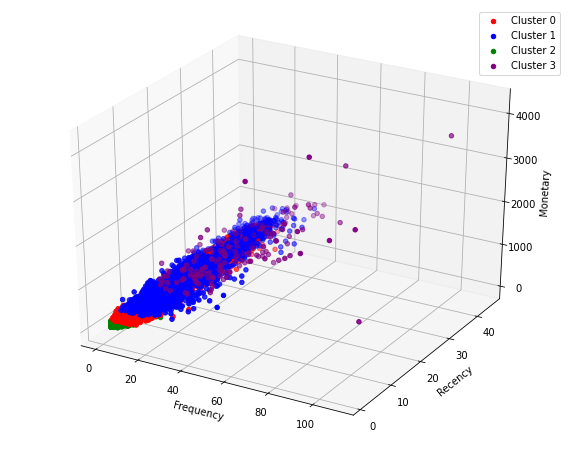

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Marqueurs de couleur pour chaque cluster
colors = ['red', 'blue', 'green', 'purple']

# Itérer sur chaque cluster et afficher les points en 3D
for cluster_id in range(4):
    cluster_data = data[kmeans.labels_ == cluster_id]
    ax.scatter(cluster_data['Frequency'], cluster_data['Recency'], cluster_data['Monetary'], c=colors[cluster_id], marker='o', label=f'Cluster {cluster_id}')

# Ajouter les labels des axes et la légende
ax.set_xlabel('Frequency')
ax.set_ylabel('Recency')
ax.set_zlabel('Monetary')
ax.legend(loc='upper right')

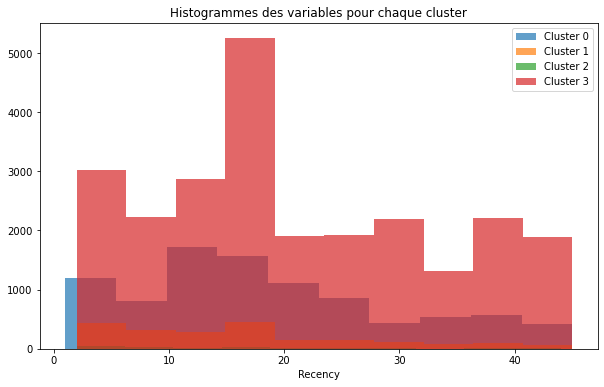

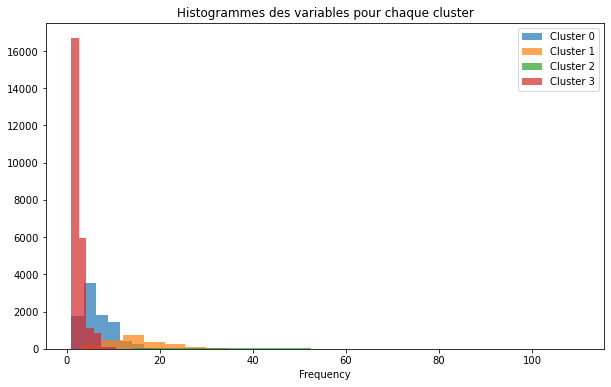

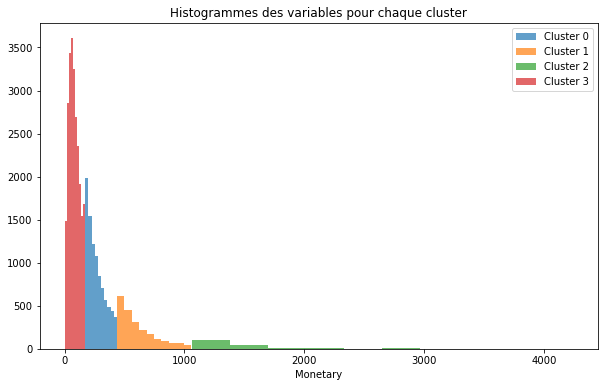

In [9]:
cluster_data = {}
cluster_data1 = {}
cluster_data2 = {}
for cluster_id in range(4):
    cluster_data[cluster_id] = data[kmeans.labels_ == cluster_id]['Recency']
    cluster_data1[cluster_id] = data[kmeans.labels_ == cluster_id]['Frequency']
    cluster_data2[cluster_id] = data[kmeans.labels_ == cluster_id]['Monetary']

# Afficher les histogrammes pour chaque cluster
plt.figure(figsize=(10, 6))

for cluster_id, data in cluster_data.items():
    plt.hist(data, bins=10, alpha=0.7, label=f'Cluster {cluster_id}')

plt.xlabel('Recency')
plt.title('Histogrammes des variables pour chaque cluster')
plt.legend(loc='upper right')
plt.show()
plt.figure(figsize=(10, 6))

for cluster_id, data in cluster_data1.items():
    plt.hist(data, bins=10, alpha=0.7, label=f'Cluster {cluster_id}')

plt.xlabel('Frequency')
plt.title('Histogrammes des variables pour chaque cluster')
plt.legend(loc='upper right')
plt.show()
plt.figure(figsize=(10, 6))

for cluster_id, data in cluster_data2.items():
    plt.hist(data, bins=10, alpha=0.7, label=f'Cluster {cluster_id}')

plt.xlabel('Monetary')
plt.title('Histogrammes des variables pour chaque cluster')
plt.legend(loc='upper right')
plt.show()